In [1]:
import numpy as np
import matplotlib.pyplot as plt
from RZutilpy.figure import bar, plot, default_img_set, colorpalettable
from scipy.stats import sem
import matplotlib.gridspec as gridspec
default_img_set()


In [2]:
ryzcolor = colorpalettable('ryz1')
C0, C1, C0_alpha, C1_alpha = np.array(ryzcolor(0)), np.array(ryzcolor(1)),np.array(ryzcolor(0)), np.array(ryzcolor(1))
C0_alpha[-1] = 0.3
C1_alpha[-1] = 0.3
Clist = [np.array(ryzcolor(2)), np.array(ryzcolor(3)), np.array([0.121, 0.6039, 0.227]), np.array(ryzcolor(1))]
Calphalist = [np.array(ryzcolor(2)), np.array(ryzcolor(3)), np.array([0.121, 0.6039, 0.227, 1.0]), np.array(ryzcolor(1))]
Calphalist[0][-1]=0.3
Calphalist[1][-1]=0.3
Calphalist[2][-1]=0.3
Calphalist[3][-1]=0.3

In [3]:
M1_Metrics = np.load('Fig8_M1_Metrics.pkl', allow_pickle=True)
M2_Metrics = np.load('Fig8_M2_Metrics.pkl', allow_pickle=True)
deltax=0.15
contrast = np.array([10, 15, 20, 25, 27, 28, 29, 31, 32, 33, 35, 40, 50, 60])
idx = np.arange(4, 10, 1)
n_condition = len(idx)
print(contrast[idx])

[27 28 29 31 32 33]


In [4]:
decoding_pre = (M1_Metrics['decoding_pre'][idx])
decoding_post = (M1_Metrics['decoding_post'][idx])
ACC_pre = ((M1_Metrics['ACC_pre'][idx])).squeeze()
ACC_post = ((M1_Metrics['ACC_post'][idx])).squeeze()
LFI_pre = (M1_Metrics['LFI_pre'][idx])
LFI_post = (M1_Metrics['LFI_post'][idx])
df_abs_pre = (M1_Metrics['df_abs_pre'][idx])
df_abs_post = (M1_Metrics['df_abs_post'][idx])
FanoFactor_pre = ((np.median(np.array(M1_Metrics['FanoFactor_pre'])[idx],axis=2))).squeeze()
FanoFactor_post = ((np.median(np.array(M1_Metrics['FanoFactor_post'])[idx],axis=2))).squeeze()
NoiseCorrelation_pre = ((np.median(np.array(M1_Metrics['correlation_pre'])[idx],axis=2))).squeeze()
NoiseCorrelation_post = ((np.median(np.array(M1_Metrics['correlation_post'])[idx],axis=2))).squeeze()
variance_pre = ((np.median(np.array(M1_Metrics['variance_pre'])[idx],axis=1))).squeeze()
variance_post = ((np.median(np.array(M1_Metrics['variance_post'])[idx],axis=1))).squeeze()
rotation = (M1_Metrics['rotation'][idx])
PCA_LFI = (np.array(M1_Metrics['PCA_LFI'][idx]))
PCA_rotation = np.array(M1_Metrics['PCA_rotation'])[idx]
PC_abs_pre = np.array(M1_Metrics['PC_abs_pre'])[idx]
PC_abs_post = np.array(M1_Metrics['PC_abs_post'])[idx]

2


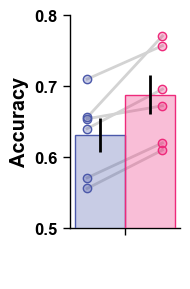

In [5]:
fig, ax=plt.subplots(1,1, figsize=(2,3))
plt.sca(ax)
plot(np.array([1-deltax, 1+deltax]), np.vstack((ACC_pre,ACC_post)), fmt='-', color='lightgray')
plot([1-deltax]*n_condition, ACC_pre, fmt='o', markerfacecolor=C0_alpha, markeredgecolor=C0)
plot([1+deltax]*n_condition, ACC_post, fmt='o', markerfacecolor=C1_alpha, markeredgecolor=C1)
bar([1], np.vstack((ACC_pre.mean(axis=0), ACC_post.mean(axis=0))).T, 
yerr = np.vstack((sem(ACC_pre,axis=0), sem(ACC_post,axis=0))).T
,ecolor='k', width=0.2, bargap=0,facecolor=[C0_alpha,C1_alpha],edgecolor=[ryzcolor(0),ryzcolor(1)],zorder=10)
ax.set_ylim([0.50, 0.80])
ax.set_yticks([0.5, 0.6, 0.7, 0.8])
ax.set_xlabel(" ")
ax.set_ylabel("Accuracy")
ax.set_xticks([1])
ax.set_xticklabels([' '])
plt.savefig('FigS51_acc.pdf')

2
2
2
2
2
2
1


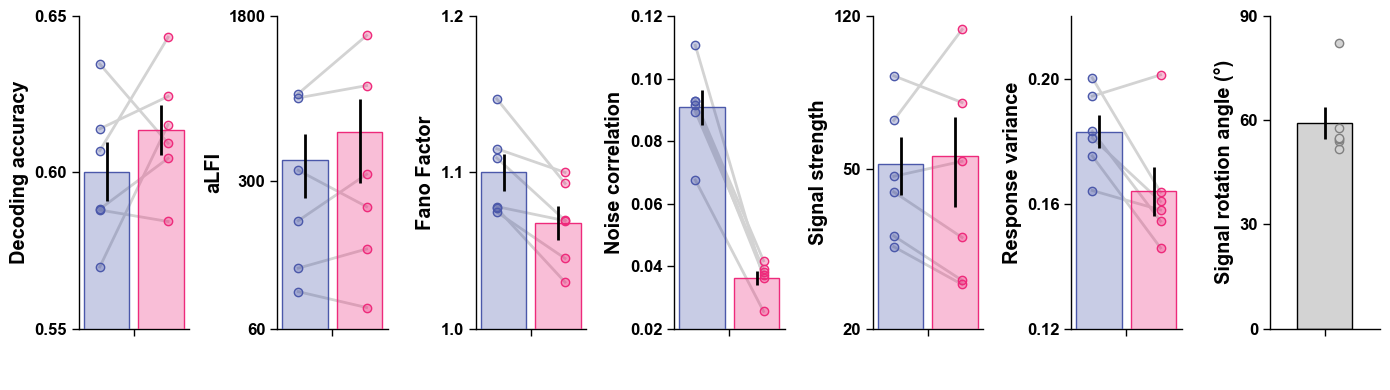

In [6]:
fig,ax = plt.subplots(1, 7, figsize=(14, 4))

plt.sca(ax[0])
plot(np.array([1-deltax, 1+deltax]), np.vstack((decoding_pre,decoding_post)), fmt='-', color='lightgray')
plot([1-deltax]*n_condition, decoding_pre, fmt='o', markerfacecolor=C0_alpha, markeredgecolor=C0)
plot([1+deltax]*n_condition, decoding_post, fmt='o', markerfacecolor=C1_alpha, markeredgecolor=C1)
bar([1], np.vstack((decoding_pre.mean(axis=0),decoding_post.mean(axis=0))).T,
    yerr = np.vstack((sem(decoding_pre,axis=0),sem(decoding_post,axis=0))).T, 
    ecolor='k', width=0.2, bargap=0.04,facecolor=[C0_alpha,C1_alpha],edgecolor=[ryzcolor(0),ryzcolor(1)],zorder=10)
ax[0].set_ylim([0.55, 0.65])
ax[0].set_yticks([0.55, 0.60, 0.65])
ax[0].set_xlabel(" ")
ax[0].set_ylabel("Decoding accuracy")
ax[0].set_xticks([1])
ax[0].set_xticklabels([' '])

plt.sca(ax[1])
plot(np.array([1-deltax, 1+deltax]), np.vstack((LFI_pre,LFI_post)), fmt='-', color='lightgray')
plot([1-deltax]*n_condition, LFI_pre, fmt='o', markerfacecolor=C0_alpha, markeredgecolor=C0)
plot([1+deltax]*n_condition, LFI_post, fmt='o', markerfacecolor=C1_alpha, markeredgecolor=C1)
bar([1], np.vstack((LFI_pre.mean(axis=0), LFI_post.mean(axis=0))).T, 
yerr = np.vstack((sem(LFI_pre,axis=0), sem(LFI_post,axis=0))).T
,ecolor='k', width=0.2, bargap=0.04,facecolor=[C0_alpha,C1_alpha],edgecolor=[ryzcolor(0),ryzcolor(1)],zorder=10)
ax[1].set_ylim([60, 1800])
ax[1].set_yscale('log')
ax[1].set_yticks([60, 300, 1800])
ax[1].set_yticklabels(['60', '300', '1800'])
ax[1].set_xlabel(" ")
ax[1].set_ylabel("aLFI")
ax[1].set_xticks([1])
ax[1].set_xticklabels([' '])
plt.minorticks_off()

plt.sca(ax[2])
plot(np.array([1-deltax, 1+deltax]), np.vstack((FanoFactor_pre,FanoFactor_post)), fmt='-', color='lightgray')
plot([1-deltax]*n_condition, FanoFactor_pre, fmt='o', markerfacecolor=C0_alpha, markeredgecolor=C0)
plot([1+deltax]*n_condition, FanoFactor_post, fmt='o', markerfacecolor=C1_alpha, markeredgecolor=C1)
bar([1], np.vstack((FanoFactor_pre.mean(axis=0), FanoFactor_post.mean(axis=0))).T, 
yerr = np.vstack((sem(FanoFactor_pre,axis=0), sem(FanoFactor_post,axis=0))).T
,ecolor='k', width=0.2, bargap=0.04,facecolor=[C0_alpha,C1_alpha],edgecolor=[ryzcolor(0),ryzcolor(1)],zorder=10)
ax[2].set_ylim([1.0,1.2])
ax[2].set_yticks([1.0, 1.1, 1.2])
ax[2].set_xlabel(" ")
ax[2].set_ylabel("Fano Factor")
ax[2].set_xticks([1])
ax[2].set_xticklabels([' '])

plt.sca(ax[3])
plot(np.array([1-deltax, 1+deltax]), np.vstack((NoiseCorrelation_pre, NoiseCorrelation_post)), fmt='-', color='lightgray')
plot([1-deltax]*n_condition, NoiseCorrelation_pre, fmt='o', markerfacecolor=C0_alpha, markeredgecolor=C0)
plot([1+deltax]*n_condition, NoiseCorrelation_post, fmt='o', markerfacecolor=C1_alpha, markeredgecolor=C1)
bar([1], np.vstack((NoiseCorrelation_pre.mean(axis=0), NoiseCorrelation_post.mean(axis=0))).T, 
yerr=np.vstack((sem(NoiseCorrelation_pre,axis=0), sem(NoiseCorrelation_post,axis=0))).T
,ecolor='k', width=0.2, bargap=0.04,facecolor=[C0_alpha,C1_alpha],edgecolor=[ryzcolor(0),ryzcolor(1)],zorder=10)
ax[3].set_xlabel(" ")
ax[3].set_ylabel("Noise correlation")
ax[3].set_xticks([1])
ax[3].set_xticklabels([' '])
ax[3].set_ylim([0.02,0.12])
ax[3].set_yticks([0.02 ,0.04, 0.06, 0.08, 0.10, 0.12])

plt.minorticks_off()

plt.sca(ax[4])
plot(np.array([1-deltax, 1+deltax]), np.vstack((df_abs_pre,df_abs_post)), fmt='-', color='lightgray')
plot([1-deltax]*n_condition, df_abs_pre, fmt='o', markerfacecolor=C0_alpha, markeredgecolor=C0)
plot([1+deltax]*n_condition, df_abs_post, fmt='o', markerfacecolor=C1_alpha, markeredgecolor=C1)
bar([1], np.vstack((df_abs_pre.mean(axis=0),df_abs_post.mean(axis=0))).T,
yerr=np.vstack((sem(df_abs_pre,axis=0), sem(df_abs_post,axis=0))).T 
,ecolor='k', width=0.2, bargap=0.04,facecolor=[C0_alpha,C1_alpha], edgecolor=[ryzcolor(0),ryzcolor(1)],zorder=10)
ax[4].set_ylim([20, 120])
ax[4].set_xlabel(" ")
ax[4].set_ylabel("Signal strength")
ax[4].set_xticks([1])
ax[4].set_xticklabels([' '])
ax[4].set_yscale("log")
ax[4].set_yticks([20, 50, 120])
ax[4].set_yticklabels(['20', '50', '120'])
plt.minorticks_off()

plt.sca(ax[5])
plot(np.array([1-deltax, 1+deltax]), np.vstack((variance_pre,variance_post)), fmt='-', color='lightgray')
plot([1-deltax]*n_condition, variance_pre, fmt='o', markerfacecolor=C0_alpha, markeredgecolor=C0)
plot([1+deltax]*n_condition, variance_post, fmt='o', markerfacecolor=C1_alpha, markeredgecolor=C1)
bar([1], np.vstack((variance_pre.mean(axis=0), variance_post.mean(axis=0))).T, 
yerr=np.vstack((sem(variance_pre,axis=0), sem(variance_post,axis=0))).T 
,ecolor='k', width=0.2, bargap=0.04,facecolor=[C0_alpha, C1_alpha], edgecolor=[ryzcolor(0),ryzcolor(1)],zorder=10)
ax[5].set_ylim([0.12, 0.22])
ax[5].set_xlabel(" ")
ax[5].set_ylabel("Response variance")
ax[5].set_xticks([1])
ax[5].set_xticklabels([' '])
ax[5].set_yticks([0.12, 0.16, 0.20])

plt.sca(ax[6])
plot([1.05]*n_condition, rotation.T, marker='o', markeredgecolor='gray', markerfacecolor='lightgray', linestyle='None')
patch,_=bar([1], rotation.mean(axis=0), yerr=sem(rotation,axis=0), width=0.2, edgecolor='k', facecolor='lightgray', ecolor='k')
ax[6].set_ylim([0, 90])
ax[6].set_yticks([0, 30, 60, 90])
ax[6].set_xlabel(" ")
ax[6].set_xlim([0.8, 1.2])
ax[6].set_ylabel('Signal rotation angle (°)')
ax[6].set_xticks([1])
ax[6].set_xticklabels([' '])

plt.savefig('FigS51_1.pdf')

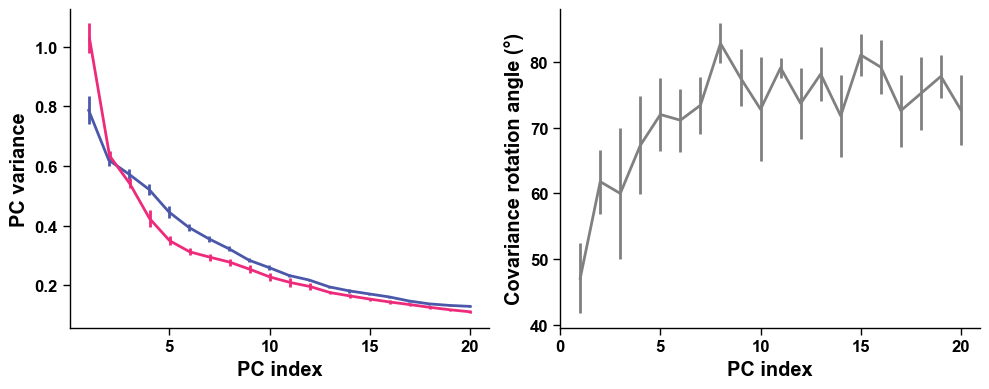

In [7]:
fig,ax = plt.subplots(1, 2, figsize=(10, 4))

plt.sca(ax[0])
plot(np.arange(1,21)-0.02, PC_abs_pre[:,:20].mean(axis=0), yerr=sem(PC_abs_pre[:,:20],axis=0),label='Pre', ecolor=C0, color=C0)
plot(np.arange(1,21)+0.02, PC_abs_post[:,:20].mean(axis=0),yerr=sem(PC_abs_post[:,:20],axis=0),label='Post', ecolor=C1, color=C1)
ax[0].set_ylabel('PC variance')
ax[0].set_xlabel('PC index')

plt.sca(ax[1])
plot(np.arange(1,21), PCA_rotation[:,:20].mean(axis=0), yerr=sem(PCA_rotation[:,:20],axis=0), color='gray', fmt='-')
ax[1].set_ylabel('Covariance rotation angle (°)')
ax[1].set_xlabel('PC index')
ax[1].set_xticks([0, 5, 10, 15, 20])

#plt.show()

plt.savefig('FigS51_2.pdf')

4


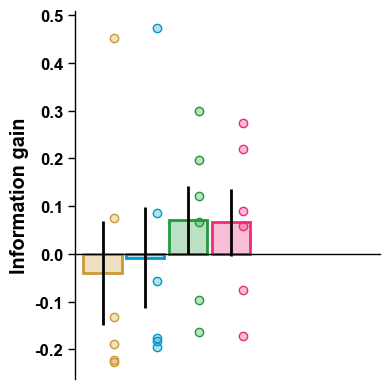

In [8]:
# four steps
fig, ax=plt.subplots(1,1, figsize=(4,4))
plot([0.655]*n_condition, PCA_LFI[:, 0], fmt='o', markerfacecolor=Calphalist[0], markeredgecolor=Clist[0])
plot([0.935]*n_condition, PCA_LFI[:, 1], fmt='o', markerfacecolor=Calphalist[1], markeredgecolor=Clist[1])
plot([1.215]*n_condition, PCA_LFI[:, 2], fmt='o', markerfacecolor=Calphalist[2], markeredgecolor=Clist[2])
plot([1.500]*n_condition, PCA_LFI[:, 3], fmt='o', markerfacecolor=Calphalist[3], markeredgecolor=Clist[3])
bh=bar(1, PCA_LFI.mean(axis=0)[None], yerr=sem(PCA_LFI,axis=0)[None],bargap=0.03, ecolor='k', color=Calphalist, edgecolor=Clist, linewidth=2)
ax.set_xlim([0.4, 2.4])
ax.set_ylabel('Information gain')
ax.set_xticks([])
ax.spines['bottom'].set_position(('data', 0))

plt.savefig('FigS51_3.pdf')

In [9]:
decoding_pre = (M2_Metrics['decoding_pre'][idx])
decoding_post = (M2_Metrics['decoding_post'][idx])
ACC_pre = ((M2_Metrics['ACC_pre'][idx])).squeeze()
ACC_post = ((M2_Metrics['ACC_post'][idx])).squeeze()
LFI_pre = (M2_Metrics['LFI_pre'][idx])
LFI_post = (M2_Metrics['LFI_post'][idx])
df_abs_pre = (M2_Metrics['df_abs_pre'][idx])
df_abs_post = (M2_Metrics['df_abs_post'][idx])
FanoFactor_pre = ((np.median(np.array(M2_Metrics['FanoFactor_pre'])[idx],axis=2))).squeeze()
FanoFactor_post = ((np.median(np.array(M2_Metrics['FanoFactor_post'])[idx],axis=2))).squeeze()
NoiseCorrelation_pre = ((np.median(np.array(M2_Metrics['correlation_pre'])[idx],axis=2))).squeeze()
NoiseCorrelation_post = ((np.median(np.array(M2_Metrics['correlation_post'])[idx],axis=2))).squeeze()
variance_pre = ((np.median(np.array(M2_Metrics['variance_pre'])[idx],axis=1))).squeeze()
variance_post = ((np.median(np.array(M2_Metrics['variance_post'])[idx],axis=1))).squeeze()
rotation = (M2_Metrics['rotation'][idx])
PCA_LFI = (np.array(M2_Metrics['PCA_LFI'][idx]))
PCA_rotation = np.array(M2_Metrics['PCA_rotation'])[idx]
PC_abs_pre = np.array(M2_Metrics['PC_abs_pre'])[idx]
PC_abs_post = np.array(M2_Metrics['PC_abs_post'])[idx]

2


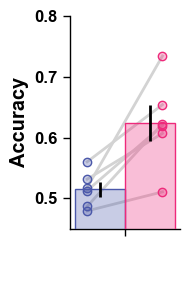

<Figure size 640x480 with 0 Axes>

In [10]:
fig, ax=plt.subplots(1,1, figsize=(2,3))
plt.sca(ax)
plot(np.array([1-deltax, 1+deltax]), np.vstack((ACC_pre,ACC_post)), fmt='-', color='lightgray')
plot([1-deltax]*n_condition, ACC_pre, fmt='o', markerfacecolor=C0_alpha, markeredgecolor=C0)
plot([1+deltax]*n_condition, ACC_post, fmt='o', markerfacecolor=C1_alpha, markeredgecolor=C1)
bar([1], np.vstack((ACC_pre.mean(axis=0), ACC_post.mean(axis=0))).T, 
yerr = np.vstack((sem(ACC_pre,axis=0), sem(ACC_post,axis=0))).T
,ecolor='k', width=0.2, bargap=0,facecolor=[C0_alpha,C1_alpha],edgecolor=[ryzcolor(0),ryzcolor(1)],zorder=10)
ax.set_ylim([0.45, 0.80])
ax.set_yticks([0.5, 0.6, 0.7, 0.8])
ax.set_xlabel(" ")
ax.set_ylabel("Accuracy")
ax.set_xticks([1])
ax.set_xticklabels([' '])
plt.show()
plt.savefig('FigS52_acc.pdf')

2
2
2
2
2
2
1


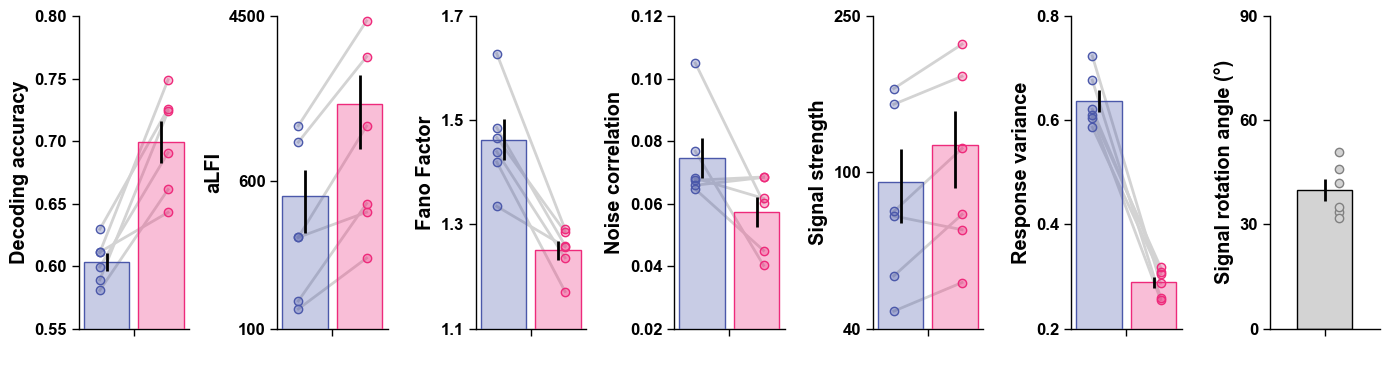

In [11]:
fig,ax = plt.subplots(1, 7, figsize=(14, 4))

plt.sca(ax[0])
plot(np.array([1-deltax, 1+deltax]), np.vstack((decoding_pre,decoding_post)), fmt='-', color='lightgray')
plot([1-deltax]*n_condition, decoding_pre, fmt='o', markerfacecolor=C0_alpha, markeredgecolor=C0)
plot([1+deltax]*n_condition, decoding_post, fmt='o', markerfacecolor=C1_alpha, markeredgecolor=C1)
bar([1], np.vstack((decoding_pre.mean(axis=0),decoding_post.mean(axis=0))).T,
    yerr = np.vstack((sem(decoding_pre,axis=0),sem(decoding_post,axis=0))).T, 
    ecolor='k', width=0.2, bargap=0.04,facecolor=[C0_alpha,C1_alpha],edgecolor=[ryzcolor(0),ryzcolor(1)],zorder=10)
ax[0].set_ylim([0.55, 0.80])
ax[0].set_yticks([0.55, 0.60, 0.65, 0.70, 0.75, 0.80])
ax[0].set_xlabel(" ")
ax[0].set_ylabel("Decoding accuracy")
ax[0].set_xticks([1])
ax[0].set_xticklabels([' '])

plt.sca(ax[1])
plot(np.array([1-deltax, 1+deltax]), np.vstack((LFI_pre,LFI_post)), fmt='-', color='lightgray')
plot([1-deltax]*n_condition, LFI_pre, fmt='o', markerfacecolor=C0_alpha, markeredgecolor=C0)
plot([1+deltax]*n_condition, LFI_post, fmt='o', markerfacecolor=C1_alpha, markeredgecolor=C1)
bar([1], np.vstack((LFI_pre.mean(axis=0), LFI_post.mean(axis=0))).T, 
yerr = np.vstack((sem(LFI_pre,axis=0), sem(LFI_post,axis=0))).T
,ecolor='k', width=0.2, bargap=0.04,facecolor=[C0_alpha,C1_alpha],edgecolor=[ryzcolor(0),ryzcolor(1)],zorder=10)
ax[1].set_ylim([100, 4500])
ax[1].set_yscale('log')
ax[1].set_yticks([100, 600, 4500])
ax[1].set_yticklabels(['100', '600', '4500'])
ax[1].set_xlabel(" ")
ax[1].set_ylabel("aLFI")
ax[1].set_xticks([1])
ax[1].set_xticklabels([' '])
plt.minorticks_off()

plt.sca(ax[2])
plot(np.array([1-deltax, 1+deltax]), np.vstack((FanoFactor_pre,FanoFactor_post)), fmt='-', color='lightgray')
plot([1-deltax]*n_condition, FanoFactor_pre, fmt='o', markerfacecolor=C0_alpha, markeredgecolor=C0)
plot([1+deltax]*n_condition, FanoFactor_post, fmt='o', markerfacecolor=C1_alpha, markeredgecolor=C1)
bar([1], np.vstack((FanoFactor_pre.mean(axis=0), FanoFactor_post.mean(axis=0))).T, 
yerr = np.vstack((sem(FanoFactor_pre,axis=0), sem(FanoFactor_post,axis=0))).T
,ecolor='k', width=0.2, bargap=0.04,facecolor=[C0_alpha,C1_alpha],edgecolor=[ryzcolor(0),ryzcolor(1)],zorder=10)
ax[2].set_ylim([1.1,1.7])
ax[2].set_yticks([1.1, 1.3, 1.5, 1.7])
ax[2].set_xlabel(" ")
ax[2].set_ylabel("Fano Factor")
ax[2].set_xticks([1])
ax[2].set_xticklabels([' '])

plt.sca(ax[3])
plot(np.array([1-deltax, 1+deltax]), np.vstack((NoiseCorrelation_pre, NoiseCorrelation_post)), fmt='-', color='lightgray')
plot([1-deltax]*n_condition, NoiseCorrelation_pre, fmt='o', markerfacecolor=C0_alpha, markeredgecolor=C0)
plot([1+deltax]*n_condition, NoiseCorrelation_post, fmt='o', markerfacecolor=C1_alpha, markeredgecolor=C1)
bar([1], np.vstack((NoiseCorrelation_pre.mean(axis=0), NoiseCorrelation_post.mean(axis=0))).T, 
yerr=np.vstack((sem(NoiseCorrelation_pre,axis=0), sem(NoiseCorrelation_post,axis=0))).T
,ecolor='k', width=0.2, bargap=0.04,facecolor=[C0_alpha,C1_alpha],edgecolor=[ryzcolor(0),ryzcolor(1)],zorder=10)
ax[3].set_xlabel(" ")
ax[3].set_ylabel("Noise correlation")
ax[3].set_xticks([1])
ax[3].set_xticklabels([' '])
ax[3].set_ylim([0.02,0.12])
ax[3].set_yticks([0.02 ,0.04, 0.06, 0.08, 0.10, 0.12])

plt.minorticks_off()

plt.sca(ax[4])
plot(np.array([1-deltax, 1+deltax]), np.vstack((df_abs_pre,df_abs_post)), fmt='-', color='lightgray')
plot([1-deltax]*n_condition, df_abs_pre, fmt='o', markerfacecolor=C0_alpha, markeredgecolor=C0)
plot([1+deltax]*n_condition, df_abs_post, fmt='o', markerfacecolor=C1_alpha, markeredgecolor=C1)
bar([1], np.vstack((df_abs_pre.mean(axis=0),df_abs_post.mean(axis=0))).T,
yerr=np.vstack((sem(df_abs_pre,axis=0), sem(df_abs_post,axis=0))).T 
,ecolor='k', width=0.2, bargap=0.04,facecolor=[C0_alpha,C1_alpha], edgecolor=[ryzcolor(0),ryzcolor(1)],zorder=10)
ax[4].set_ylim([40, 250])
ax[4].set_xlabel(" ")
ax[4].set_ylabel("Signal strength")
ax[4].set_xticks([1])
ax[4].set_xticklabels([' '])
ax[4].set_yscale("log")
ax[4].set_yticks([40, 100, 250])
ax[4].set_yticklabels(['40', '100', '250'])
plt.minorticks_off()

plt.sca(ax[5])
plot(np.array([1-deltax, 1+deltax]), np.vstack((variance_pre,variance_post)), fmt='-', color='lightgray')
plot([1-deltax]*n_condition, variance_pre, fmt='o', markerfacecolor=C0_alpha, markeredgecolor=C0)
plot([1+deltax]*n_condition, variance_post, fmt='o', markerfacecolor=C1_alpha, markeredgecolor=C1)
bar([1], np.vstack((variance_pre.mean(axis=0), variance_post.mean(axis=0))).T, 
yerr=np.vstack((sem(variance_pre,axis=0), sem(variance_post,axis=0))).T 
,ecolor='k', width=0.2, bargap=0.04,facecolor=[C0_alpha, C1_alpha], edgecolor=[ryzcolor(0),ryzcolor(1)],zorder=10)
ax[5].set_ylim([0.2, 0.8])
ax[5].set_xlabel(" ")
ax[5].set_ylabel("Response variance")
ax[5].set_xticks([1])
ax[5].set_xticklabels([' '])
ax[5].set_yticks([0.2, 0.4, 0.6, 0.8])

plt.sca(ax[6])
plot([1.05]*n_condition, rotation.T, marker='o', markeredgecolor='gray', markerfacecolor='lightgray', linestyle='None')
patch,_=bar([1], rotation.mean(axis=0), yerr=sem(rotation,axis=0), width=0.2, edgecolor='k', facecolor='lightgray', ecolor='k')
ax[6].set_ylim([0, 90])
ax[6].set_yticks([0, 30, 60, 90])
ax[6].set_xlabel(" ")
ax[6].set_xlim([0.8, 1.2])
ax[6].set_ylabel('Signal rotation angle (°)')
ax[6].set_xticks([1])
ax[6].set_xticklabels([' '])

# plt.show()
plt.savefig('FigS52_1.pdf')

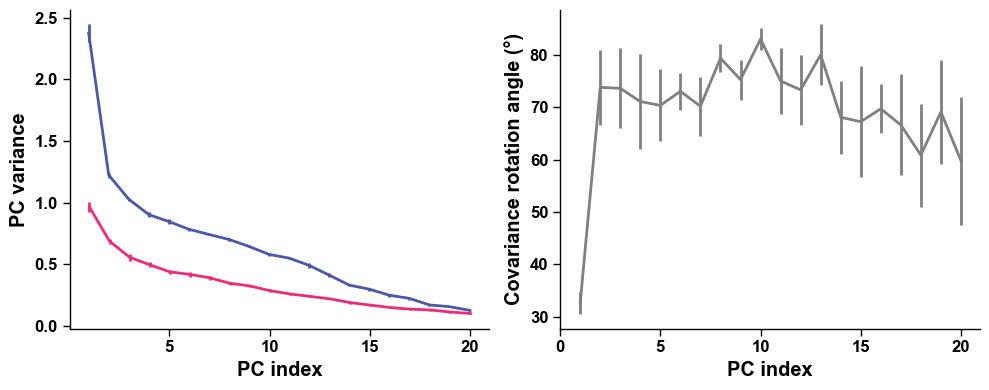

In [12]:
#fig,ax = plt.subplots(1, 2, figsize=(10, 4), gridspec_kw={'width_ratios': [1,1,1,4,4]})

fig,ax = plt.subplots(1, 2, figsize=(10, 4))

plt.sca(ax[0])
plot(np.arange(1,21)-0.02, PC_abs_pre.mean(axis=0), yerr=sem(PC_abs_pre,axis=0),label='Pre', ecolor=C0, color=C0)
plot(np.arange(1,21)+0.02, PC_abs_post.mean(axis=0),yerr=sem(PC_abs_post,axis=0),label='Post', ecolor=C1, color=C1)
ax[0].set_ylabel('PC variance')
ax[0].set_xlabel('PC index')

plt.sca(ax[1])
plot(np.arange(1,21), PCA_rotation.mean(axis=0), yerr=sem(PCA_rotation,axis=0), color='gray', fmt='-')
ax[1].set_ylabel('Covariance rotation angle (°)')
ax[1].set_xlabel('PC index')
ax[1].set_xticks([0, 5, 10, 15, 20])

#plt.show()

plt.savefig('FigS52_2.pdf')

4


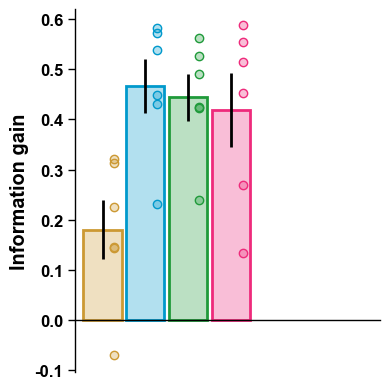

In [13]:
# four steps
fig, ax=plt.subplots(1,1, figsize=(4,4))
plot([0.655]*n_condition, PCA_LFI[:, 0], fmt='o', markerfacecolor=Calphalist[0], markeredgecolor=Clist[0])
plot([0.935]*n_condition, PCA_LFI[:, 1], fmt='o', markerfacecolor=Calphalist[1], markeredgecolor=Clist[1])
plot([1.215]*n_condition, PCA_LFI[:, 2], fmt='o', markerfacecolor=Calphalist[2], markeredgecolor=Clist[2])
plot([1.500]*n_condition, PCA_LFI[:, 3], fmt='o', markerfacecolor=Calphalist[3], markeredgecolor=Clist[3])
bh=bar(1, PCA_LFI.mean(axis=0)[None], yerr=sem(PCA_LFI,axis=0)[None],bargap=0.03, ecolor='k', color=Calphalist, edgecolor=Clist, linewidth=2)
ax.set_xlim([0.4, 2.4])
ax.set_ylabel('Information gain')
ax.set_xticks([])
ax.spines['bottom'].set_position(('data', 0))

plt.savefig('FigS52_3.pdf')